Source: https://huggingface.co/course/chapter1/3?fw=pt

# Transformers, what can they do?

In this section, we will look at what Transformer models can do and use our first tool from the 🤗 Transformers library: the [pipeline()] function.

## Tranformers are everywhere!

Transformer models are used to solve all kinds of NLP tasks, like the ones mentioned in the previous section. Here are some of the companies and organizaitons using Hugging Face and Transformer models, who also contribute back to the community by sharing their models:

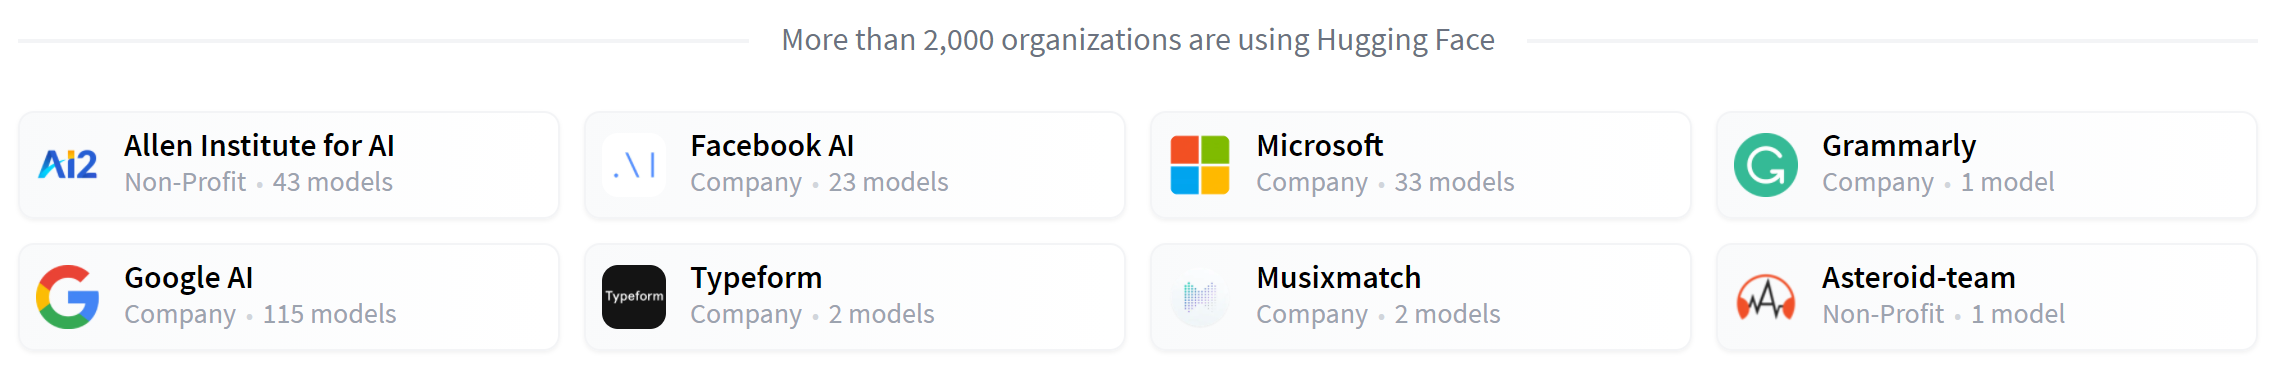

The 🤗 Transformers library (https://github.com/huggingface/transformers) provides the functionality to create and use those shared models. The Model Hub (https://huggingface.co/models) contains thousands of pretrained models that anyone can download and use. You can upload your own model to the Hub!

Before diving into how Transformer model work under the hood, let's look at a few examples of how they can be used to solve some interesting NLP problems.

## Working with pipelines

https://youtu.be/tiZFewofSLM

The most basic object in the 🤗 Transformers library is the [pipeline()] function. It connects a model with its necessary preprocessing and postprocessing steps, allow us to directly input any text and get an intelligible answer:

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\rober\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rober\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'POSITIVE', 'score': 0.9598046541213989}]

We can even pass several sentences!

In [2]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598046541213989},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

By default, this pipeline selects a particularpretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cache when you create the [classifier] object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.

Some of the currently available pipelines (https://huggingface.co/transformers/main_classes/pipelines.html) are:

- feature-extraction (get the vector representation of a text)
- fill-mask
- ner (named entity recognition)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification

Let's have a look at a fiew of these!

## Zero-shot classification

We'll start by tackling a more challenging task where we need to classify texts that haven't been labelled. This is a common scnenario in real-world projects because annotating text is usually time-consuming and requires domain experise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for classification, so you don't have to rely on the labels of the pretrained model. You've already eebn how the model can classify a sentence as positive or negative using those two labels - but it can also classify the text using any other set of labels you like.

In [3]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to roberta-large-mnli and revision 130fb28 (https://huggingface.co/roberta-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at roberta-large-mnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.9562343955039978, 0.02697218954563141, 0.016793323680758476]}